# Colourizing Old Photos and Videos

[DeOldify](https://github.com/jantic/DeOldify) is an open source project that has some impressive results on colorizing images and videos. It is easy to use. DeOldify is not based on Tensorflow, but the competing framwork PyTorch.

In [1]:
!git clone https://github.com/jantic/DeOldify.git DeOldify


Cloning into 'DeOldify'...
remote: Enumerating objects: 1877, done.
remote: Total 1877 (delta 0), reused 0 (delta 0), pack-reused 1877
Receiving objects: 100% (1877/1877), 69.24 MiB | 28.55 MiB/s, done.
Resolving deltas: 100% (810/810), done.


In [2]:
cd DeOldify

/content/DeOldify


In [5]:
!git checkout ad68cd0

Note: checking out 'ad68cd0'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at ad68cd0 fix except


In [6]:
!pip install -r requirements.txt

In [7]:
from os import path
import torch
import fastai
from fasterai.visualize import *
from pathlib import Path
torch.backends.cudnn.benchmark=True

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 553507836/553507836 [00:10<00:00, 53828106.59it/s]


In [8]:
!mkdir 'models'
!wget wget https://www.dropbox.com/s/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth?dl=0 -O ./models/ColorizeArtistic_gen.pth

--2019-08-30 11:51:53--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2019-08-30 11:51:53--  https://www.dropbox.com/s/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth [following]
--2019-08-30 11:51:54--  https://www.dropbox.com/s/raw/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdc5c0e21175f91c714c56469b1.dl.dropboxusercontent.com/cd/0/inline/AnkoRnVV2Z4zy3ZgXhFlXM7UIKR27M49QF2ZHSl_AqTAr7alq5movfrVVJWcpaeadTM-fGEBYobjN6aiJlyFJUlmTPhWXjCf75bJZWa98Co5hw/file# [following]
--2019-08-30 11:51:54--  https://ucdc5c0e21175f91

In [9]:
colorizer = get_image_colorizer(artistic=True)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:442: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:445: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 76795358.01it/s]


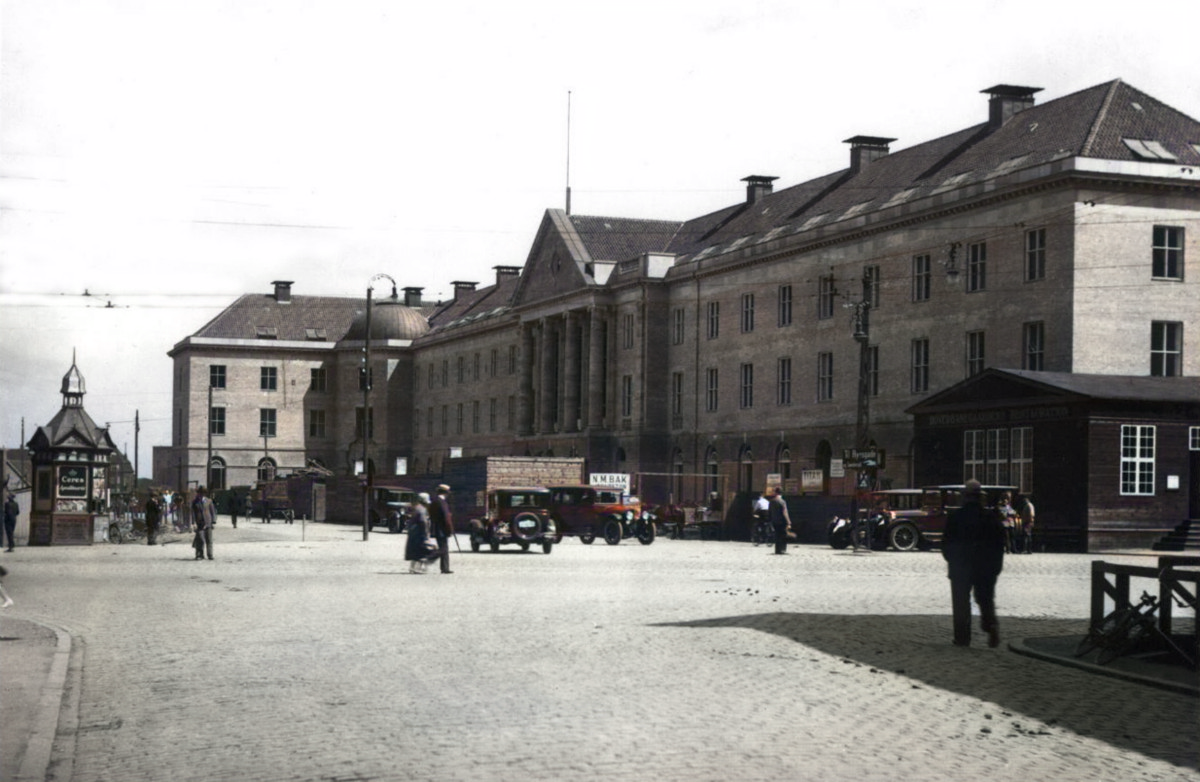

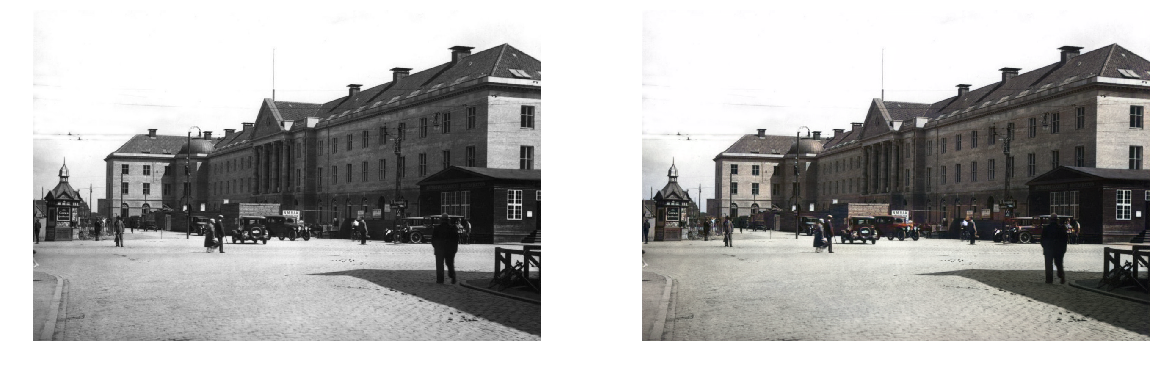

In [10]:
source_url = 'http://mklarsen.dk/aarhus/New%20Aarhus%20Web/show/B/images/Banegaardplads%201928.jpg' 
render_factor = 35 

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')